<a href="https://colab.research.google.com/github/AkshatMadhani/LANGGRAPH_BASICS/blob/main/langgraph_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langchain_core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import END,MessageGraph
from langchain_core.messages import HumanMessage

In [ ]:
def add_one(input:list[HumanMessage]):
  input[0].content=input[0].content+"a"
  return input

In [ ]:
graph=MessageGraph()

In [ ]:
graph.add_node("branch_a",add_one)
graph.add_node("branch_b",add_one)
graph.add_node("branch_c",add_one)
graph.add_node("branch_d",add_one)
graph.add_edge("branch_a","branch_b")
graph.add_edge("branch_a","branch_c")
graph.add_edge("branch_a","branch_d")
graph.add_node("FINAL_node",add_one)
graph.add_edge("branch_b","FINAL_node")
graph.add_edge("branch_c","FINAL_node")
graph.add_edge("branch_d","FINAL_node")
graph.add_edge("FINAL_node",END)


In [ ]:
graph.set_entry_point("branch_a")

In [ ]:
runnable=graph.compile()

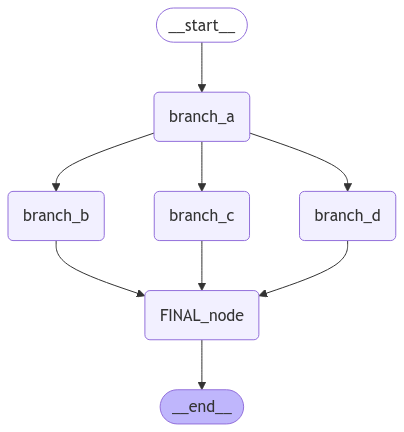

In [ ]:
from IPython.display import Image,display
display(Image(runnable.get_graph().draw_mermaid_png()))


In [ ]:
runnable.invoke("a")

[HumanMessage(content='aaaaaa', additional_kwargs={}, response_metadata={}, id='52a99137-11cf-4e2a-8253-f2afb2efe075')]

In [ ]:
def work_with_a(input:list[HumanMessage]):
  return input
def work_with_b(input:list[HumanMessage]):
  print("using branch_b")
  return input
def work_with_c(input:list[HumanMessage]):
  print("using branch_c")
  return input
def router(input:list[HumanMessage]):
  if "use_b" in input[0].content:
    return "branch_b"
  else:
      return "branch_c"

In [ ]:
graphs=MessageGraph()

In [ ]:
graphs.add_node("branch_a",work_with_a)
graphs.add_node("branch_b",work_with_b)
graphs.add_node("branch_c",work_with_c)
graphs.add_conditional_edges(
    "branch_a",
    router,
    ["branch_b","branch_c"]

)
graphs.add_edge("branch_b",END)
graphs.add_edge("branch_c",END)


In [ ]:
graphs.set_entry_point("branch_a")
runner=graphs.compile()

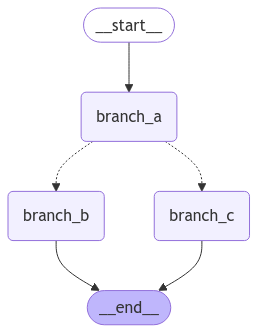

In [ ]:
from IPython.display import Image,display
display(Image(runner.get_graph().draw_mermaid_png()))

In [ ]:
runner.invoke("hi use_c")

using branch_c


[HumanMessage(content='hi use_c', additional_kwargs={}, response_metadata={}, id='d8ab60da-3756-4692-889b-04f142745b55')]

In [ ]:
!pip install langchain_groq
from langchain_groq import ChatGroq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
groq_api_key=userdata.get("groq_api_key")

In [ ]:
model=ChatGroq(
    model_name='llama-3.3-70b-versatile',
    groq_api_key=groq_api_key
)

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import END,StateGraph,START
from langchain_core.messages import HumanMessage

In [ ]:
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [ ]:
graph_builder= StateGraph(State)


In [ ]:
def chatbot(state:State):
  return {"messages":[model.invoke(state["messages"])]}

In [ ]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)


In [ ]:
graph=graph_builder.compile()

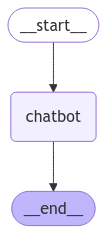

In [ ]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
while True:
  user_input=input("User:")
  if user_input.lower() in ["quit","q"]:
    print("good bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
      print(event.values())
      for value in event.values():
        print(value['messages'])
        print("Assistant:",value["messages"])


User:hello
dict_values([{'messages': [AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.036363636, 'prompt_time': 0.006976858, 'queue_time': 0.027917352000000003, 'total_time': 0.043340494}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_4196e754db', 'finish_reason': 'stop', 'logprobs': None}, id='run-47464ce2-ed10-4f86-8dcc-8caa512fc7e9-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})]}])
[AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.036363636, 'prompt_time': 0.006976858, 'queue_time': 0.027917352000000003, 'total_time': 0.043340494}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_4196e754db', 'finish_reason': 'stop',